In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df_path = os.path.join('data', 'raw', 'Churn_Modelling.csv')
df = pd.read_csv(df_path)

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df_copy=df.copy()

In [7]:
df_copy.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df_copy.shape

(10000, 14)

In [9]:
df_copy.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
df_copy.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
# Check for duplicate rows
df_copy.duplicated().sum()

np.int64(0)

In [13]:
# Check for duplicate columns
duplicate_coulumns= df_copy.columns[df_copy.columns.duplicated()].tolist()
duplicate_coulumns

[]

In [14]:
# Check the duplicate columns interms of values
duplicate_columns_values= df_copy.columns[df_copy.T.duplicated()].tolist()
duplicate_columns_values


[]

In [15]:
# Find the junk columns
junk_columns=[col for col in df_copy.columns if df_copy[col].nunique()<2 or 'unnamed' in col.lower()]
junk_columns

[]

In [16]:
# See if there are any columns with whitespaces
columns_with_spaces= df_copy.columns[df_copy.columns.str.contains(' ')]
columns_with_spaces

Index([], dtype='object')

In [17]:
import  numpy as np
numerical_columns= df_copy.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns= df_copy.select_dtypes(include=['object']).columns.tolist()

In [18]:
numerical_columns

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [19]:
categorical_columns

['Surname', 'Geography', 'Gender']

In [20]:
# Display the columns with their unique value count
for col in df_copy.columns:
    print(f"Column: {col}")
    print(f"unique values count : {df_copy[col].nunique()}")
   # print(f"unique values : {df_copy[col].unique()}")
    print("-" * 40)

Column: RowNumber
unique values count : 10000
----------------------------------------
Column: CustomerId
unique values count : 10000
----------------------------------------
Column: Surname
unique values count : 2932
----------------------------------------
Column: CreditScore
unique values count : 460
----------------------------------------
Column: Geography
unique values count : 3
----------------------------------------
Column: Gender
unique values count : 2
----------------------------------------
Column: Age
unique values count : 70
----------------------------------------
Column: Tenure
unique values count : 11
----------------------------------------
Column: Balance
unique values count : 6382
----------------------------------------
Column: NumOfProducts
unique values count : 4
----------------------------------------
Column: HasCrCard
unique values count : 2
----------------------------------------
Column: IsActiveMember
unique values count : 2
-------------------------------

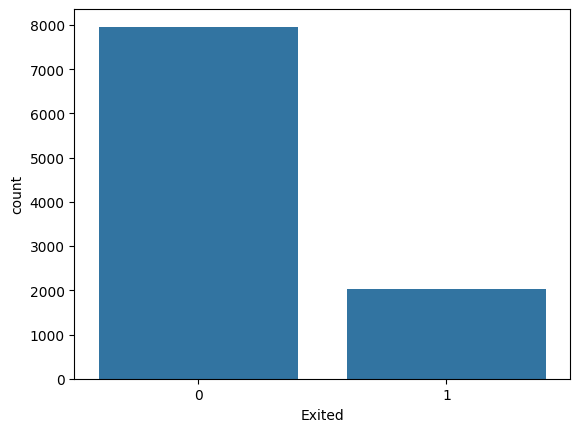

In [21]:
# Check the target distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Exited', data=df_copy)
plt.show()

In [22]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

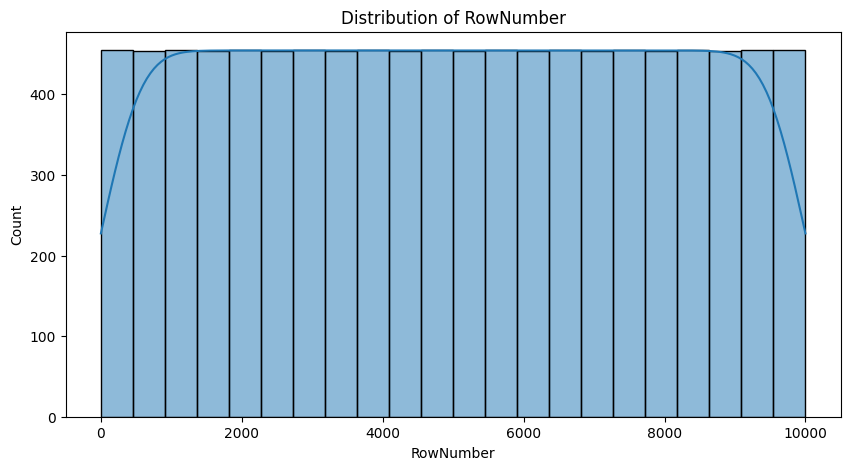

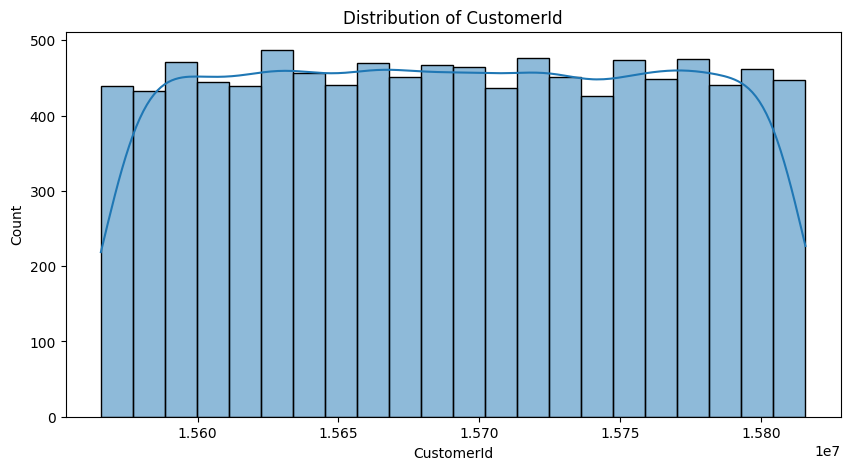

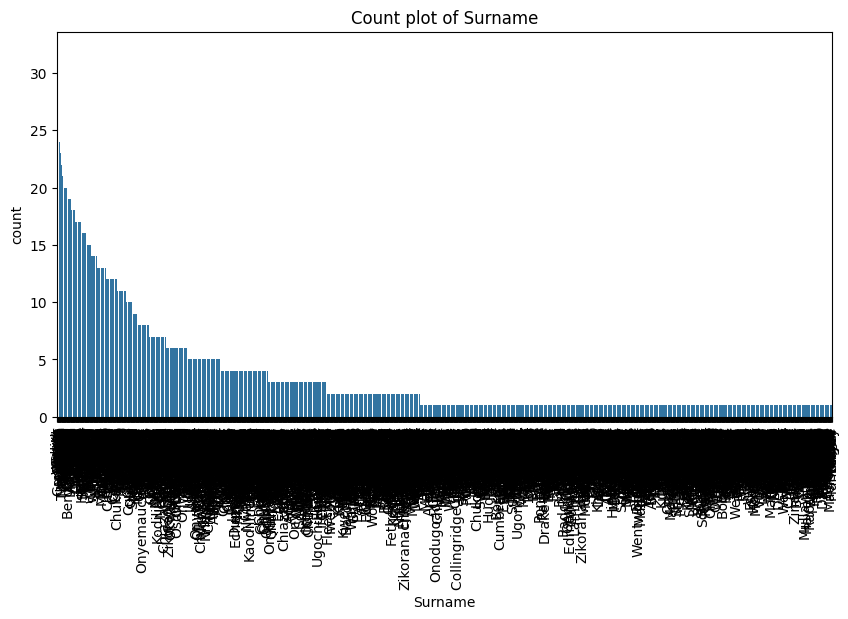

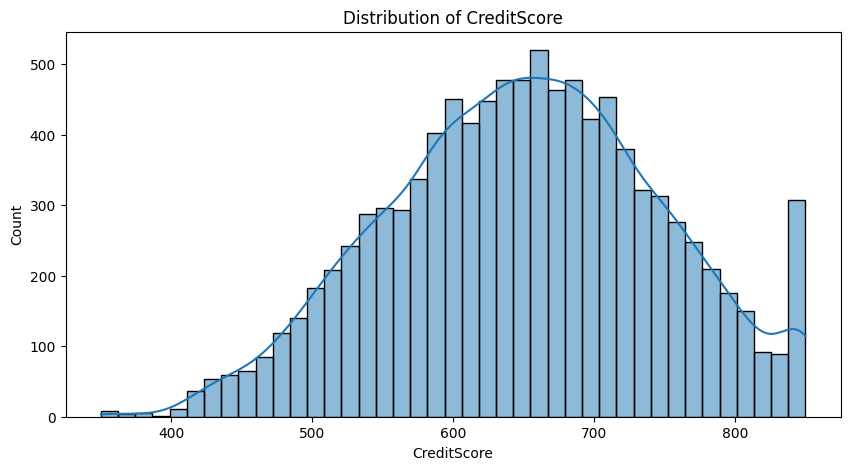

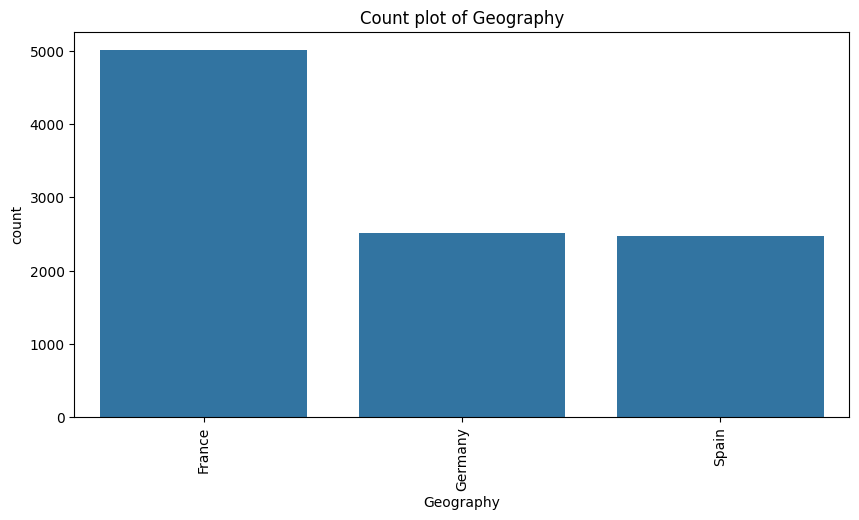

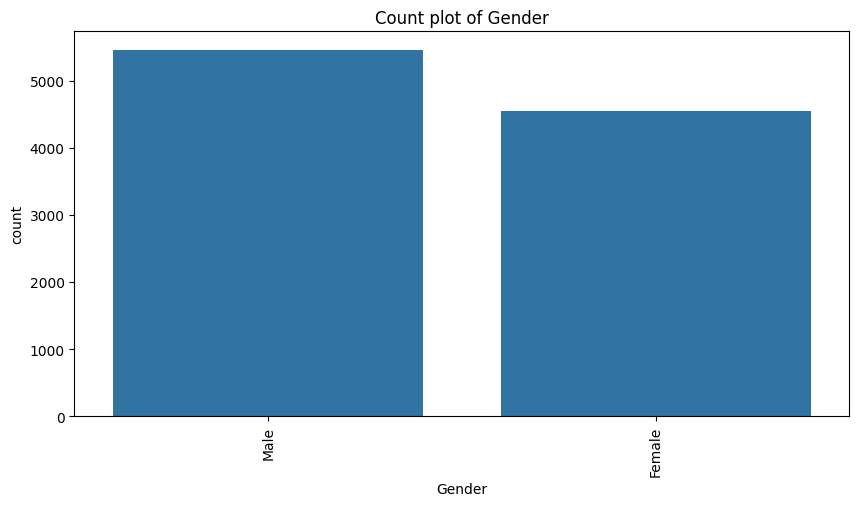

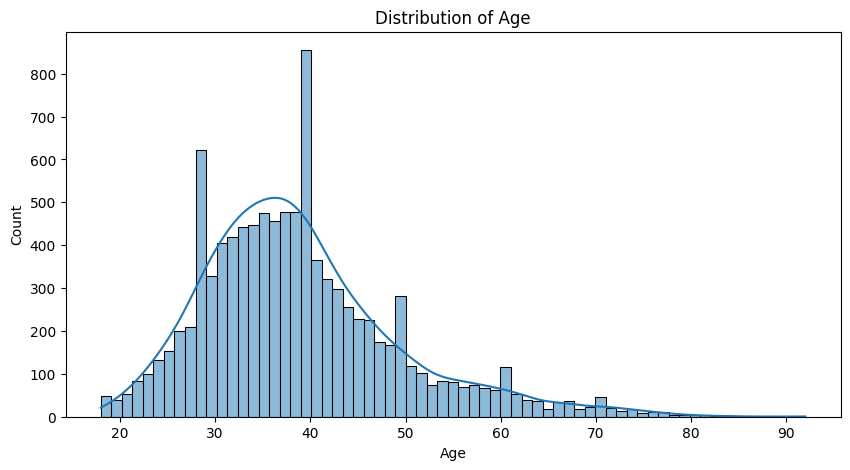

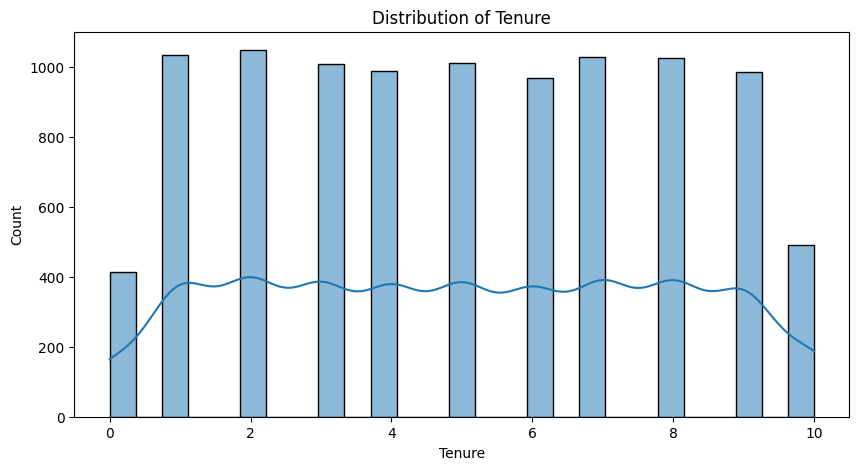

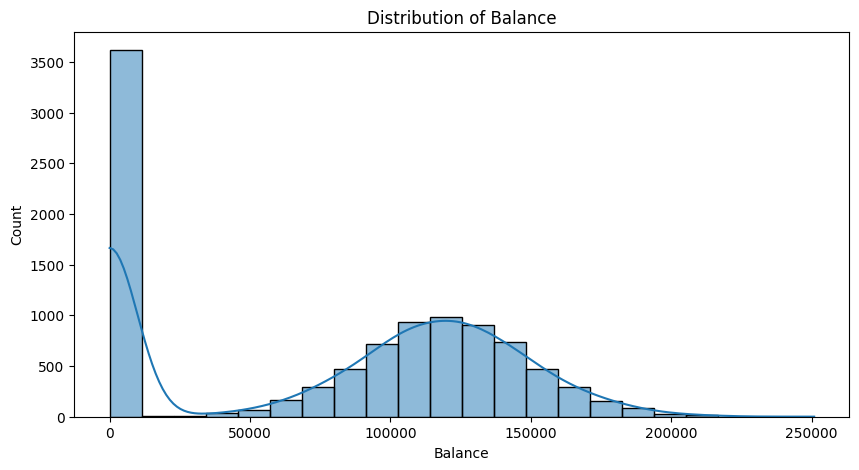

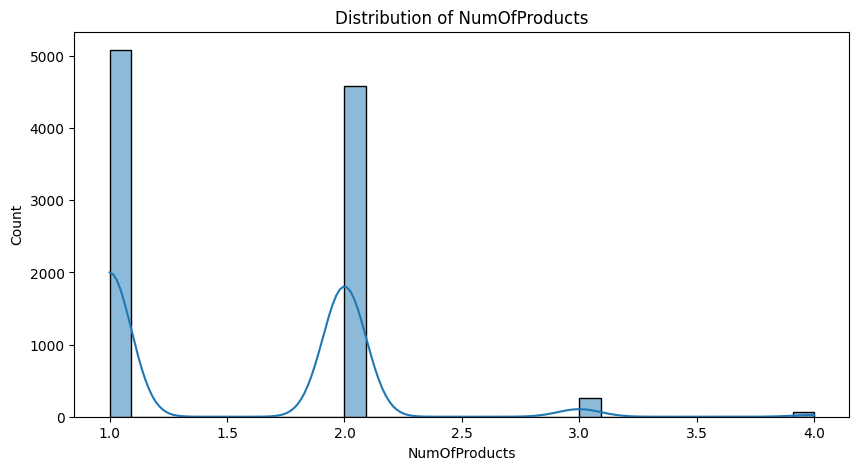

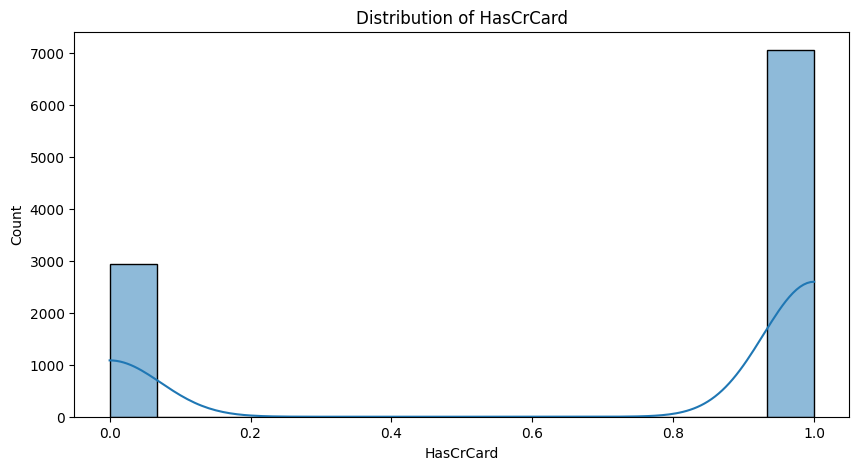

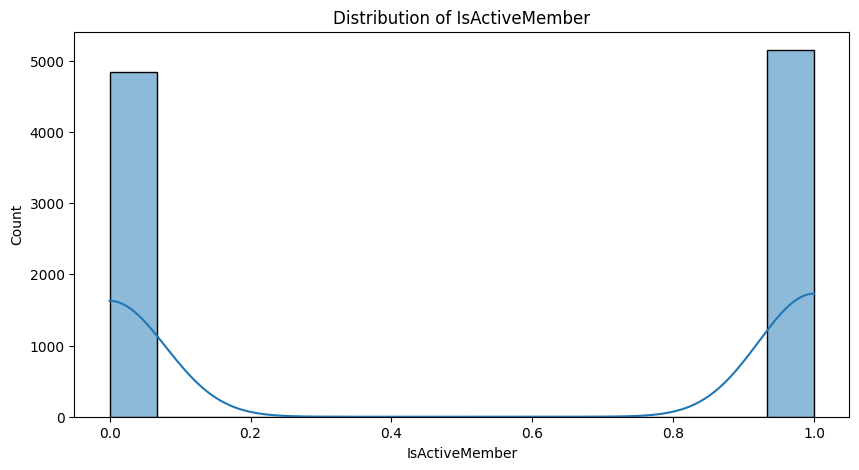

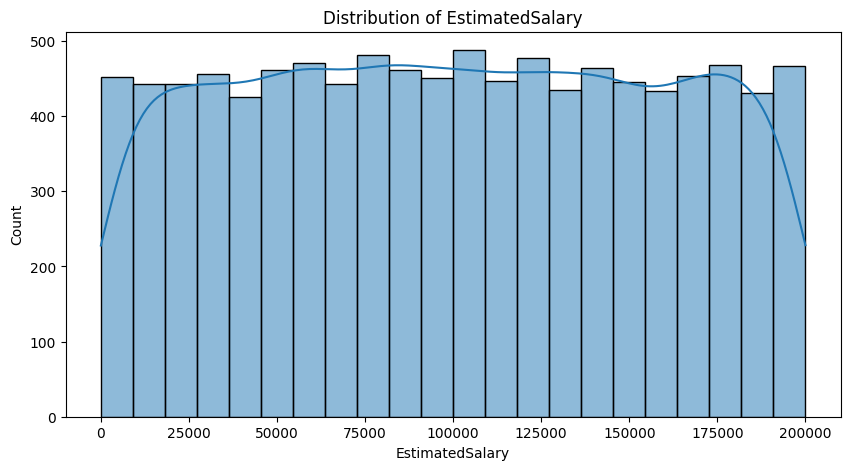

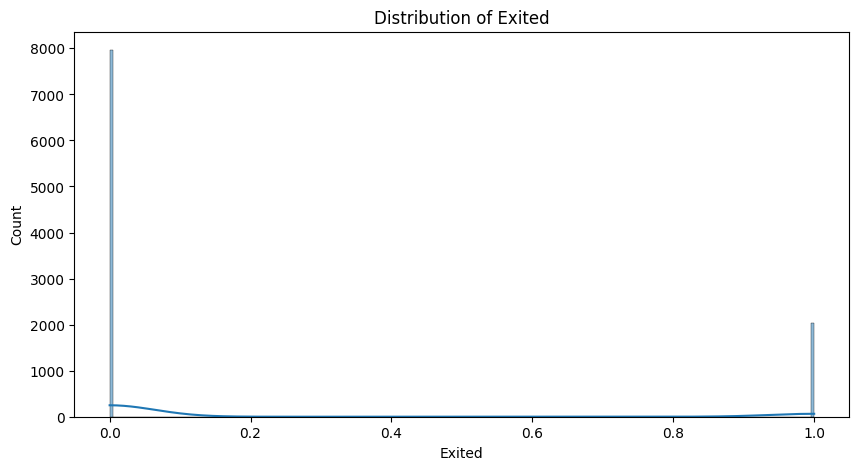

In [23]:
# Univariate analysis
def univariate_analysis(df_copy):
    for col in df_copy.columns:
        if df_copy[col].dtype == 'object':
           plt.figure(figsize=(10, 5))
           sns.countplot(x=df_copy[col], order=df_copy[col].value_counts().index)
           plt.title(f"Count plot of {col}")
           plt.xticks(rotation=90)
           plt.show()
        else:
            plt.figure(figsize=(10, 5))
            sns.histplot(df_copy[col], kde=True)
            plt.title(f"Distribution of {col}")
            plt.show()
univariate_analysis(df_copy)

In [24]:
# Bivariate analysis can be done to understand the relationship between features and the target variable (Survived).
def bivariate_analysis(df_copy, target):
    # Identify the target type
    if df_copy[target].dtype == 'object' or df_copy[target].nunique() < 10:
        target_type = 'categorical'
    else:
        target_type = 'continuous'
    for feature in df_copy.columns:
        if feature == target:
            continue
        # feature is categorical
        plt.figure(figsize=(10, 5))
        if df_copy[feature].dtype == 'object' or df_copy[feature].nunique() < 10:
            if target_type == 'categorical':
                sns.countplot(x=feature, hue=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
                plt.xticks(rotation=45)
                plt.show()
            else:
                # Check skewness of the target variable
                skewness = df_copy[target].skew()
                if abs(skewness) > 1:
                    agg_func = 'median'
                    temp=df_copy.groupby(feature)[target].median().reset_index()
                else:
                    agg_func = 'mean'
                    temp=df_copy.groupby(feature)[target].mean().reset_index()
                sns.barplot(x=feature, y=target, data=temp)
                plt.title(f'{feature} vs {target} ({agg_func})')
        # feature is continuous
        else:
            if target_type == 'categorical':
                sns.boxplot(x=target, y=feature, data=df_copy)
                plt.title(f'{target} vs {feature}')
            else:
                sns.scatterplot(x=feature, y=target, data=df_copy)
                plt.title(f'{feature} vs {target}')
        plt.tight_layout()
        plt.show()

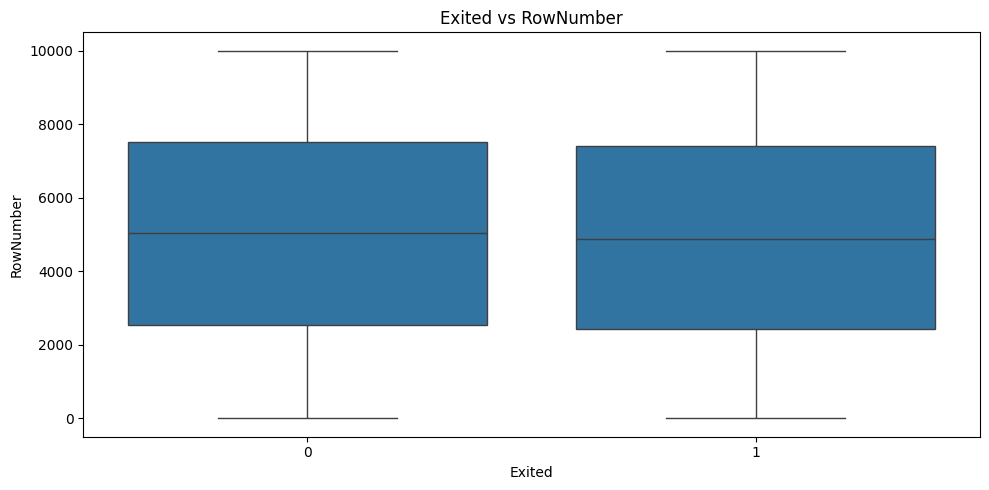

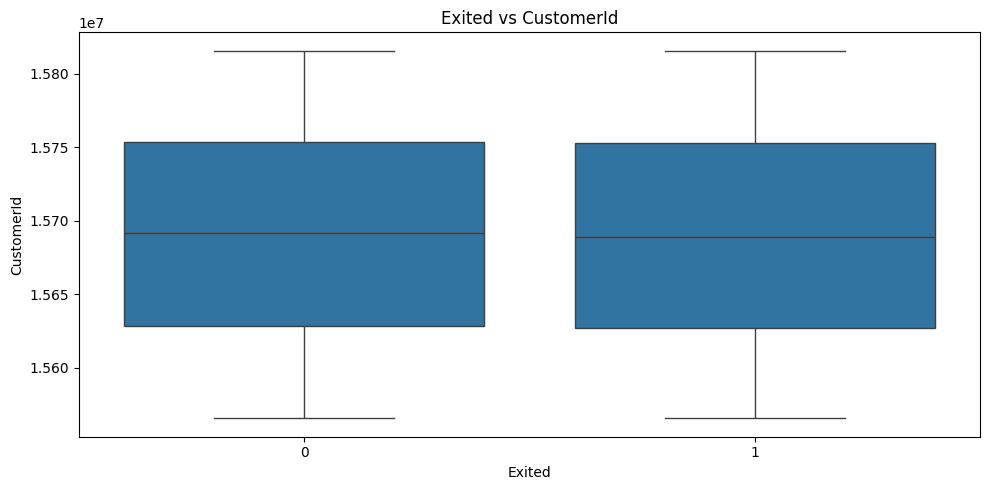

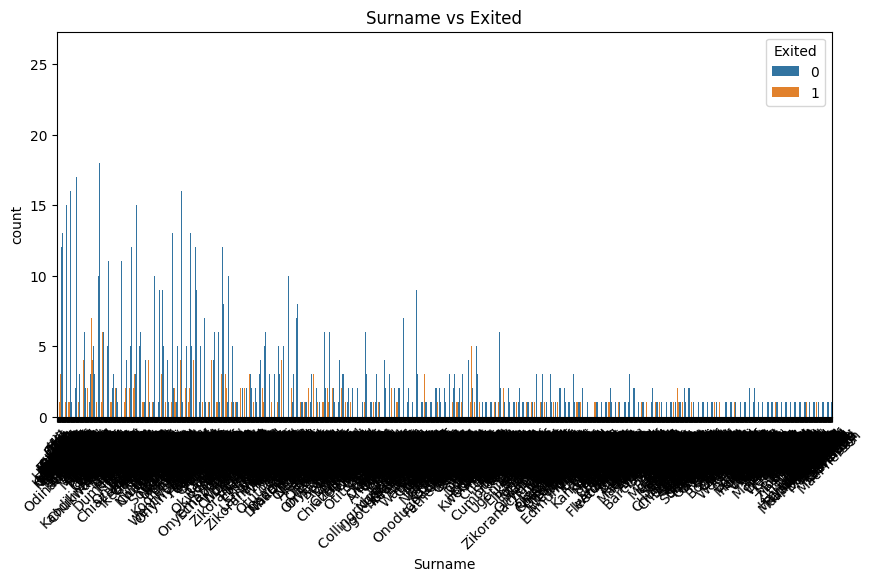

<Figure size 640x480 with 0 Axes>

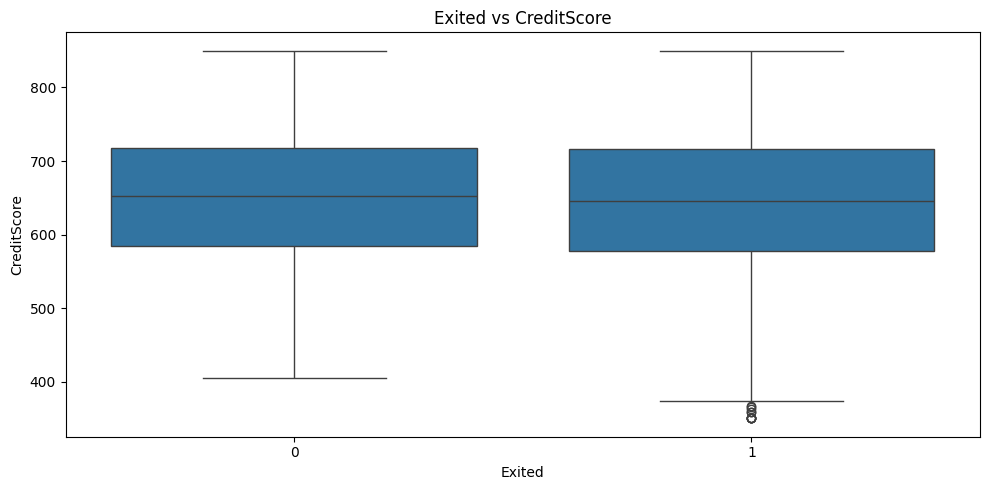

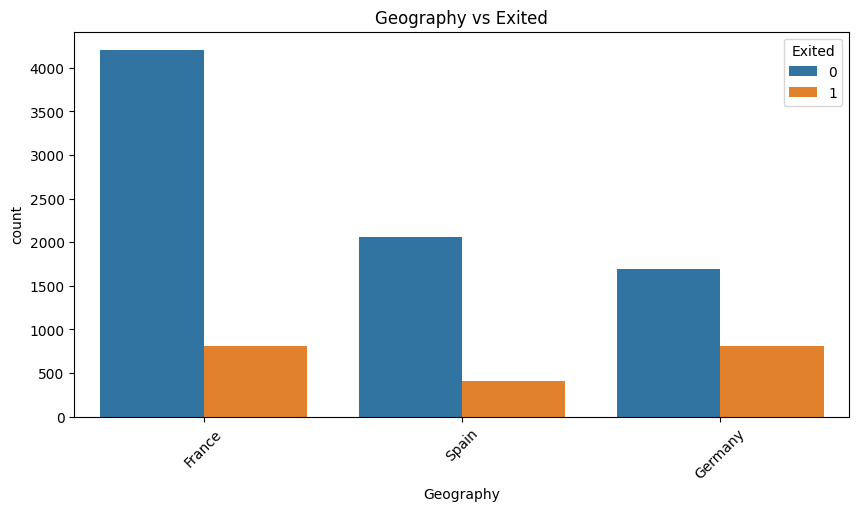

<Figure size 640x480 with 0 Axes>

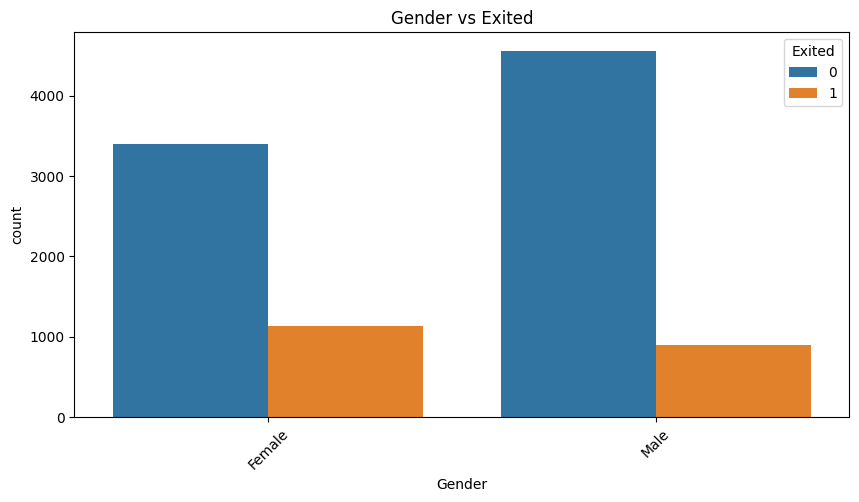

<Figure size 640x480 with 0 Axes>

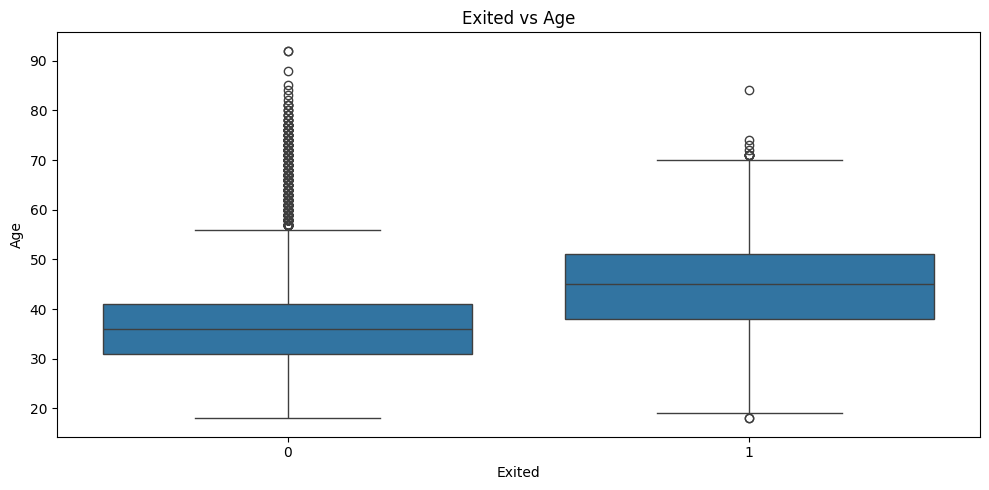

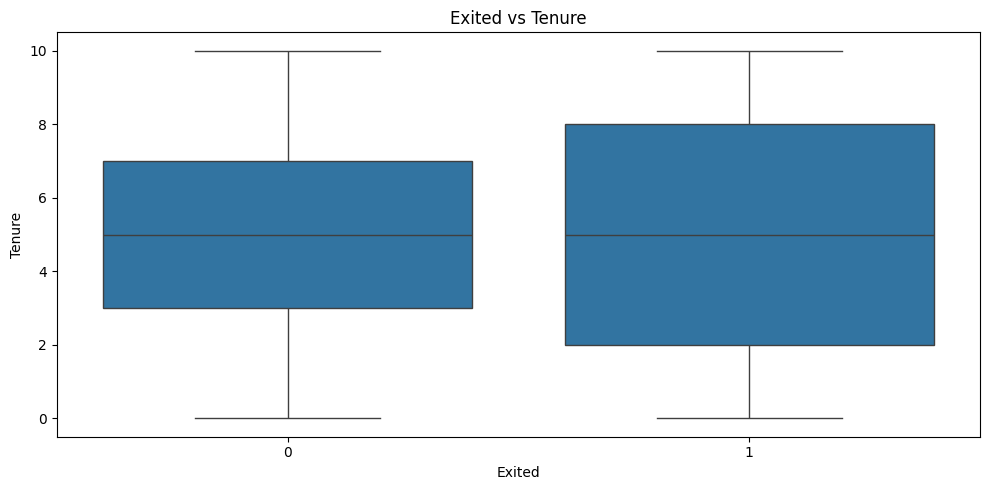

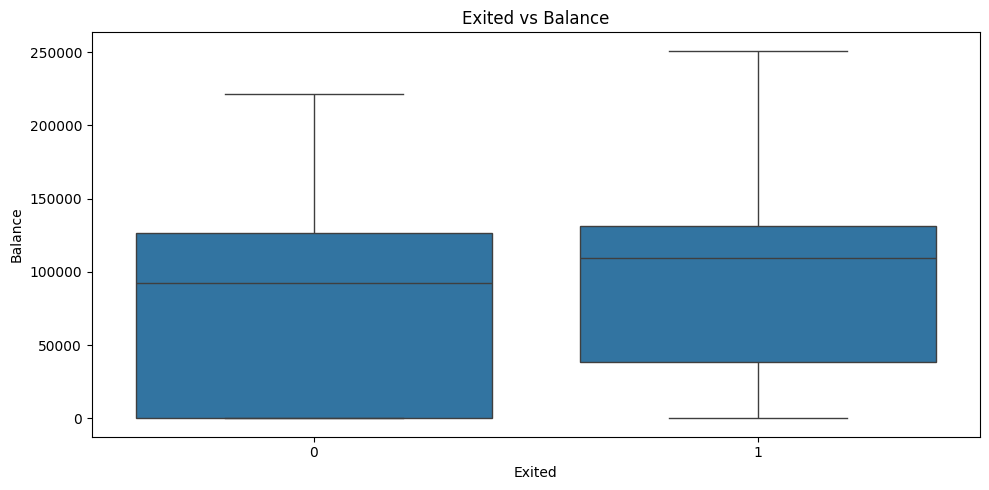

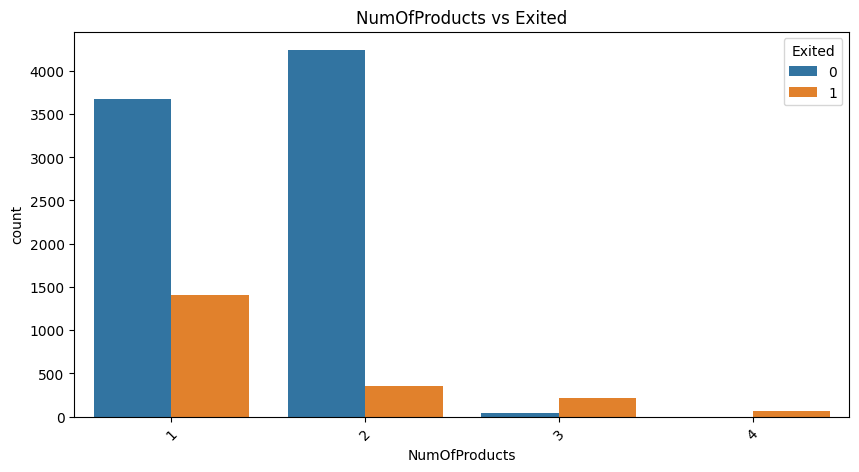

<Figure size 640x480 with 0 Axes>

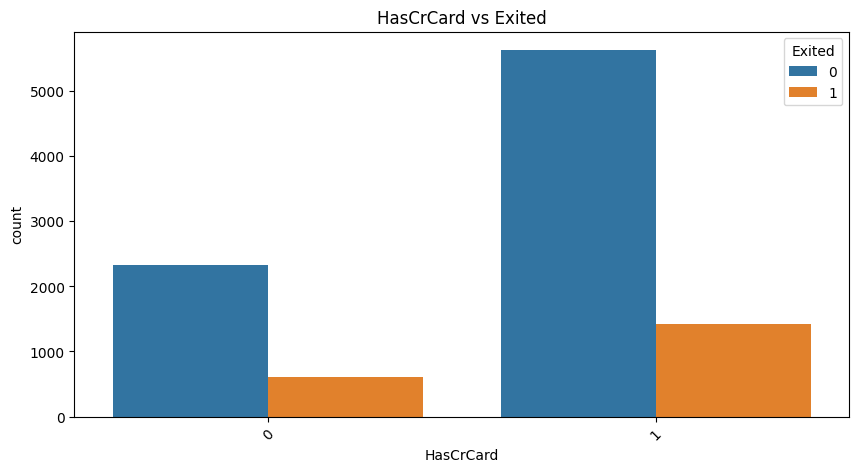

<Figure size 640x480 with 0 Axes>

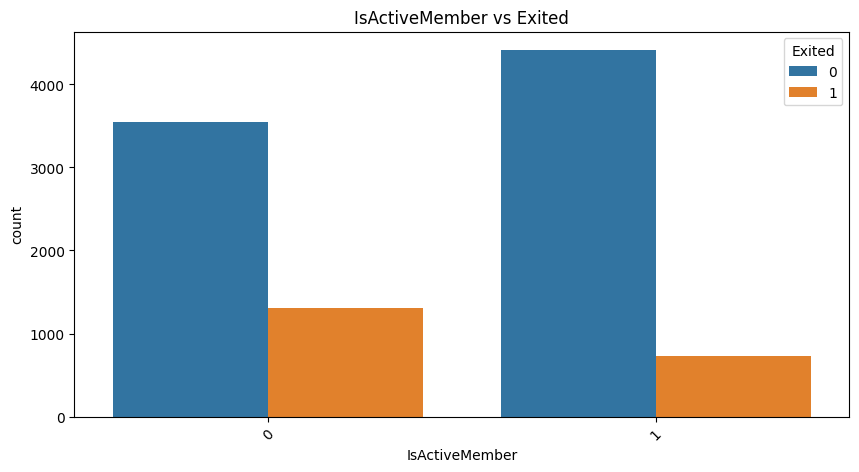

<Figure size 640x480 with 0 Axes>

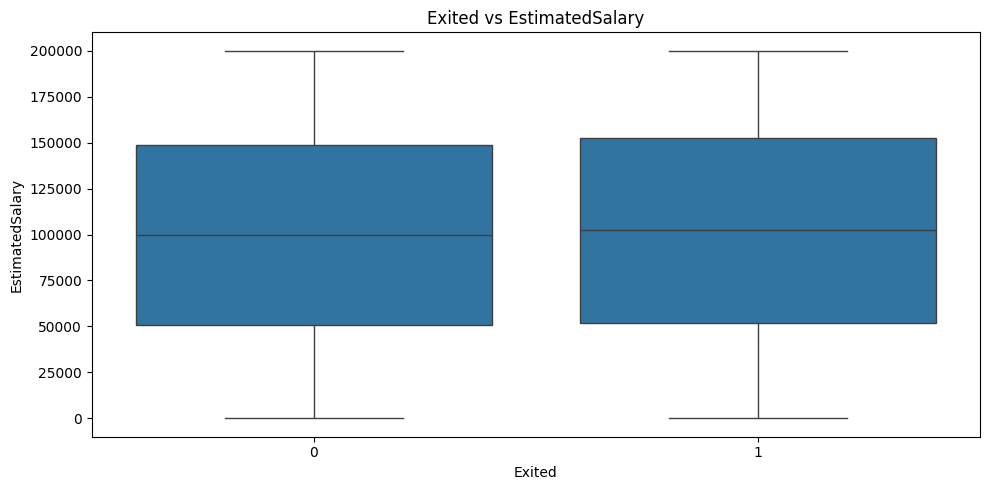

In [25]:
bivariate_analysis(df_copy, 'Exited')

In [26]:
# Multivariate analysis can be done to understand the relationship between multiple features and the target variable (Survived).
def multivariate_analysis(df_copy, numerical_columns):
    plt.figure(figsize=(15, 10))
    sns.heatmap(df_copy[numerical_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()   


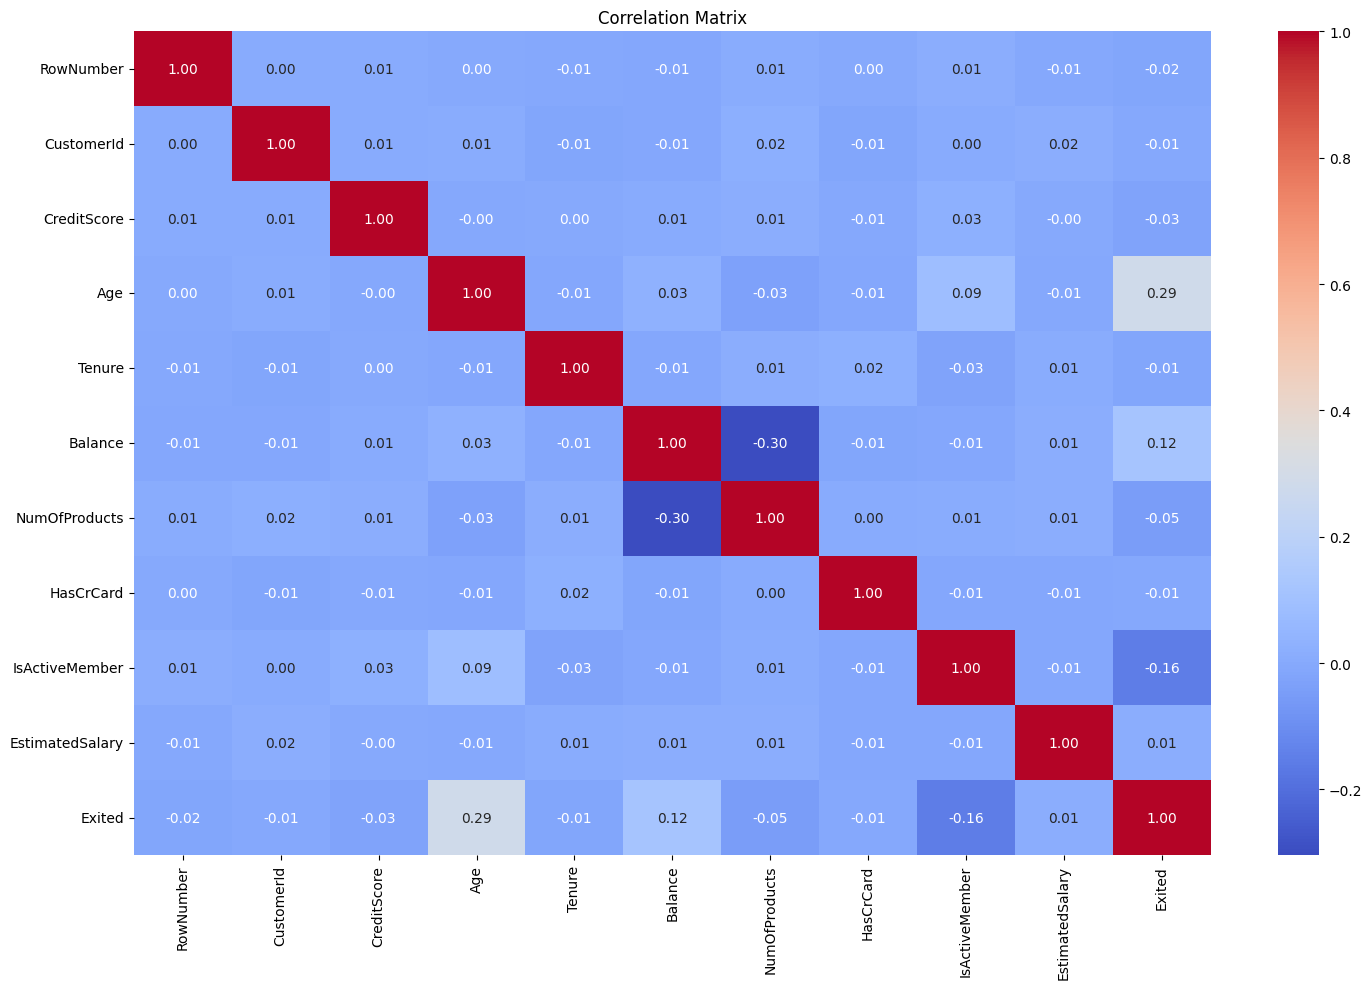

In [27]:
if numerical_columns:
    multivariate_analysis(df_copy, numerical_columns)
else:
    print("No numerical columns available for multivariate analysis.")

In [28]:
# Drop irrelevant columns
df_copy.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df_copy.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [29]:
df_copy.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [31]:
# Give me the columns that has negative values
negative_columns= [
    col for col in df_copy.columns
    if np.issubdtype(df_copy[col].dtype, np.number) and (df_copy[col]<0).any()
]
print(negative_columns)


[]


In [32]:
# Give me the columns that has zero values
zero_columns = [
    col for col in df_copy.columns 
    if np.issubdtype(df_copy[col].dtype, np.number) and (df_copy[col] == 0).any()
]
print("Columns with zero values:", zero_columns)

Columns with zero values: ['Tenure', 'Balance', 'HasCrCard', 'IsActiveMember', 'Exited']


In [58]:
# Save the cleaned data
cleaned_data_path=os.path.join('data','processed','cleaned_data.csv')
df_copy.to_csv(cleaned_data_path, index=False)

#### Creation of dependent and independent features

In [33]:
# lets create a independent and dependent features
X= df_copy.drop('Exited', axis=1)
y= df_copy['Exited']
X.shape, y.shape


((10000, 10), (10000,))

In [34]:
# Perform the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Display the shapes of the train and test sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape) 

X_train shape: (8000, 10)
X_test shape: (2000, 10)
y_train shape: (8000,)
y_test shape: (2000,)


In [38]:
# Find the numerical and categorical columns after the data clean up
numerical_columns= df_copy.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns= df_copy.select_dtypes(include=['object']).columns.tolist()

In [39]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [43]:
# Check for outliers in the numerical columns
for col in numerical_columns:
    q1 = df_copy[col].quantile(0.25)
    q3 = df_copy[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    outliers = df_copy[(df_copy[col] < lower_bound) | (df_copy[col] > upper_bound)]
    if not outliers.empty:
        print(f"Outliers found in column '{col}':\n")
        #print(outliers)
        print("-" * 40)

Outliers found in column 'CreditScore':

----------------------------------------
Outliers found in column 'Age':

----------------------------------------
Outliers found in column 'NumOfProducts':

----------------------------------------
Outliers found in column 'Exited':

----------------------------------------


In [44]:
# Handle the outliers
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd
from scipy.stats import yeojohnson
class OutlierHandler(BaseEstimator, TransformerMixin):
    def __init__(self, discrete_threshold=10, skew_threshold=0.75):
       # self.outlier_columns = outlier_columns
        self.discrete_threshold = discrete_threshold
        self.skew_threshold = skew_threshold
        self.params_ = {}
        self.outlier_columns = []
    # we need to give y=None as the scikit-learn’s Pipeline, GridSearchCV, cross_val_score, and other utilities always pass both X and y to .fit(), even for unsupervised transformers (like imputers, scalers, outlier handlers, etc.) even if they are not used.
    # This is to ensure compatibility with scikit-learn's API.
    def fit(self, X, y=None):
        X_ = X.copy()
        numeric_columns= X_.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if X_[col].dropna().empty:
                continue
            unique_values = X_[col].nunique()
            col_type = 'discrete' if unique_values <= self.discrete_threshold else 'continuous' 
            Q1 = X_[col].quantile(0.25)
            Q3 = X_[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            extreme_outliers = ((X_[col] < lower_bound) | (X_[col] > upper_bound)).sum()
            if extreme_outliers > 0:
                self.outlier_columns.append(col)
                if col_type == 'discrete':
                    self.params_[col] = ('cap', lower_bound, upper_bound)
                else:
                    skewness = X_[col].skew()
                    if abs(skewness) > self.skew_threshold:
                        if (X_[col] >= 0).all():
                            self.params_[col] = ('log',)
                        else:
                            self.params_[col] = ('yeojohnson',)
                    else:
                        self.params_[col] = ('cap', lower_bound, upper_bound)
        return self  # fit method returns the self which is a common practice in scikit-learn to allow for method chaining
    
    def transform(self, X):
        X_ = X.copy()
        for col, params in self.params_.items():
            if params[0] == 'cap':
                _, lower, upper = params
                #X_[col] < lower compares each value in the column to the lower bound. It returns a boolean Series where each entry is True if the corresponding value is less than the lower bound and False otherwise.
                X_[col] = np.where(X_[col] < lower, lower,
                                   np.where(X_[col] > upper, upper, X_[col]))
            elif params[0] == 'log':
                X_[col] = np.log1p(X_[col])
            elif params[0] == 'yeojohnson':
                X_[col], _ = yeojohnson(X_[col])
        return X_ # transform method returns the transformed DataFrame, allowing for further processing or model fitting

In [51]:
categorical_encode= ['Geography','Gender']
continuous_numerical_columns=[ col for col in numerical_columns if df_copy[col].nunique() > 10]



In [48]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [52]:
continuous_numerical_columns

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

#### Column Transformer for Encoding and Scaling

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
def build_preprocessor(continuous_numerical_columns, categorical_encode):
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(),continuous_numerical_columns),
            ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_columns),
        ],
        remainder='drop'
    )
    return preprocessor

In [56]:
from sklearn.pipeline import Pipeline

def build_pipeline(continuous_numerical_columns, categorical_encode):
    preprocessor = build_preprocessor(continuous_numerical_columns, categorical_encode)

    pipe = Pipeline([
        ('outliers', OutlierHandler()),
        ('encode_scale', preprocessor)
    ])
    return pipe


In [ ]:
'''import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard
import datetime

## Build Our ANN Model
model=Sequential([
    Dense(64,activation='relu',input_shape=(X_train.shape[1],)), ## HL1 Connected wwith input layer
    Dense(32,activation='relu'), ## HL2
    Dense(1,activation='sigmoid')  ## output layer
]

)
print(model.summary())
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss=tensorflow.keras.losses.BinaryCrossentropy()
print(loss)
## compile the model
model.compile(optimizer=opt,loss="binary_crossentropy",metrics=['accuracy'])
## Set up the Tensorboard
from tensorflow.keras.callbacks import EarlyStopping,TensorBoard

log_dir="logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorflow_callback=TensorBoard(log_dir=log_dir,histogram_freq=1)

## Set up Early Stopping
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)
### Train the model
history=model.fit(
    X_train,y_train,validation_data=(X_test,y_test),epochs=100,
    callbacks=[tensorflow_callback,early_stopping_callback]
)
model.save('model.h5')
## Load Tensorboard Extension
%load_ext tensorboard
%tensorboard --logdir logs/fit'''

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import datetime
import os


# 1. Preprocessing (Outliers + Encoding + Scaling)

# Keras model (Sequential) only accepts pure numeric NumPy arrays or tensors.You first preprocess manually (fit_transform / transform) and then train using the processed data.
# model.fit --> it does not perform any preprocessing like build_pipeline() or scaling/encoding.
pipeline = build_pipeline(continuous_numerical_columns, categorical_encode)
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

# Method to build our ANN model

def build_ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # For binary classification
    ])
    
    model.compile(
        optimizer=Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


# 2. Build and Train ANN Model

model = build_ann_model(X_train_processed.shape[1])

log_dir = os.path.join("logs", "fit", datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "_final")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train_processed, y_train,
    validation_data=(X_test_processed, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[tensorboard_callback, early_stopping],
    verbose=1
)

# 3. Evaluate Model

y_pred_prob = model.predict(X_test_processed).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

c:\Mounika\All Projects\ANN-Classification\env-ann\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7936 - loss: 0.4757 - val_accuracy: 0.8035 - val_loss: 0.4296
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8010 - loss: 0.4498 - val_accuracy: 0.8145 - val_loss: 0.4266
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8008 - loss: 0.4461 - val_accuracy: 0.8145 - val_loss: 0.4229
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8016 - loss: 0.4441 - val_accuracy: 0.8165 - val_loss: 0.4211
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8040 - loss: 0.4397 - val_accuracy: 0.8135 - val_loss: 0.4188
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8085 - loss: 0.4358 - val_accuracy: 0.8190 - val_loss: 0.4181
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8074 - loss: 0.4353 - val_accuracy: 0.8175 - val_loss: 0.4146
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8098 - loss: 0.4327 - val_accu